In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data from xlxs files
path = '/Users/clairetang/Downloads/data_analyst_sample_data/'
files = os.listdir(path)
quarters = [f for f in os.listdir(path) if f[0] != '.']  # ignore hidden files
data_E = {}
data_Z = {}
for q in quarters:
    for e in [f for f in os.listdir(path + q) if f[0] != '.'] :  # ignore hidden files
        current_path = path + q + '/' + e + '/'
        for f in os.listdir(current_path):
            if ('xlsx' not in f):  # ignore hidden/other formatted files
                continue
            file_path = current_path + f
            sheets = pd.ExcelFile(file_path).sheet_names 
            df_E = pd.read_excel(file_path, engine='openpyxl', sheet_name=sheets[0])
            df_Z = pd.read_excel(file_path, engine='openpyxl', sheet_name=sheets[1])
            data_E[q + ", " + e] = df_E
            data_Z[q + ", " + e] = df_Z

In [3]:
# count total statistics: using all of the groups (quarters, events) in the dataset
count = {}
for group in data_E:
    df = data_E[group]
    param = 'Stanford School'
    contains_department = param in df.columns  # certain sheets may be missing this information
    for i in range(len(df)):
        school = "Unspecified"
        if (contains_department and not pd.isna(df[param][i])):
            school = df[param][i]
        if school not in count:
            count[school] = 1
        else:
            count[school] += 1

# none of the online participants specified school! adding a new catagory for Zoom attendees
count["Zoom Attendee (unknown)"] = 0
for group in data_Z:
    count["Zoom Attendee (unknown)"] += len(data_Z[group])

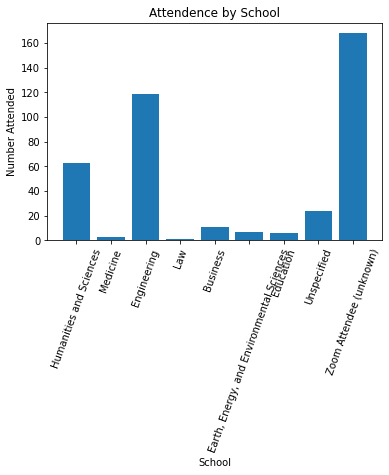

In [4]:
# make a plot
X = count.keys()
y = [count[x] for x in X]
plt.bar(X, y)
plt.title('Attendence by School')
plt.xlabel('School')
plt.ylabel('Number Attended')

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 70)

plt.show()